In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import astropy.constants as cs

Se considera el sistema Tierra-Sol, por tanto, primero se definen las constantes necesarias para expresar la órbita

In [2]:
# Se definen las constantes

mT = cs.M_earth.value # masa de la Tierra (kg)
mS = cs.M_sun.value # masa del Sol (kg)
mTS = mT + mS # Masa total (suma de masas de Tierra y Sol) (kg)
mu = (mT*mS)/mTS  # Masa reducida (kg)
k = (cs.G.value)*mT*mS # Constante de kepler kgm^3/s^2
rT = cs.au.value # Distancia en promedio entre el Sol y la Tierra (m)

Suponiendo una órbita con periodo $\tau = 365$ días, note que la magnitud del momento angular está dada por $\ell = \mu r^2 \dot{\theta}$

In [3]:
dias = 24*60*60 # segundos en un día
tau =  365*dias # segundos en un año

P_theta = mu*rT**2*2*np.pi/tau  # momento angular (kgm^2/s)

Función que devuelve las ecuaciones de Hamilton (únicamente las que se usarán, es decir $\dot{r}$ y $\dot{P_r}$)

In [4]:
# Ecuaciones de Hamilton
def equations(t, y):
    r, P_r = y
    drdt = P_r / mu
    dP_rdt = P_theta**2 / (mu * r**3) - k / r**2
    return [drdt, dP_rdt] # Devuelve \dot{r} y \dot{P_r}

Se definen las condiciones iniciales, además de definir el periodo de tiempo que se considerará (es decir, desde $t=0$ hasta el tiempo en segundos de un año)

In [5]:
# Condiciones iniciales
r0 = rT 
P_r0 = 0.0
y0 = [r0, P_r0]

# Periodo de tiempo para el cual se dibujará la trayectoria
t_span = (0, tau) # Desde t>0 hasta un año en segundos
t_eval = np.linspace(t_span[0], t_span[1], 1000)

Se resuelven las ecuaciones de Hamilton usando el método de Runge-Kutta

In [6]:
# Solución de las ecuaciones de Hamilton por método de Runge-Kutta
sol = solve_ivp(equations, t_span, y0, t_eval=t_eval, method='RK45')

Se grafica el diagrama de fases en el plano $r - P_r$ en el espacio fase

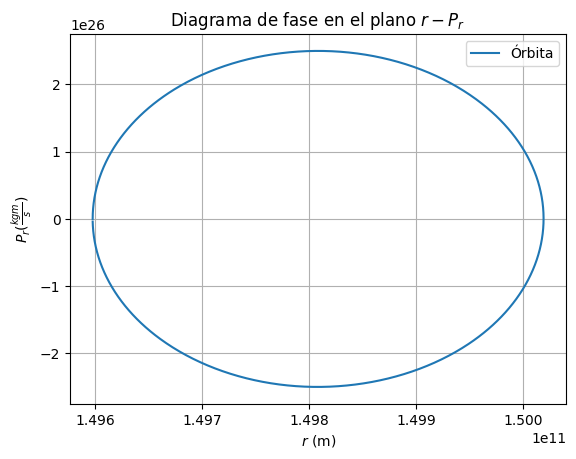

In [7]:

plt.figure(facecolor='white')
plt.plot(sol.y[0], sol.y[1], label='Órbita')
plt.xlabel(r'$r$ (m)')
plt.ylabel(r'$P_r (\frac{kgm}{s})$')
plt.title(r'Diagrama de fase en el plano $r - P_r$')
plt.legend()
plt.grid(True)
plt.show()